<a href="https://colab.research.google.com/github/prabdeepkaur/algo_strategies_mini_project2_prabdeep/blob/main/algo_strategies2_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT**-2



In [2]:
!pip install memory_profiler matplotlib numpy


In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage


# **PROBLEM-1**

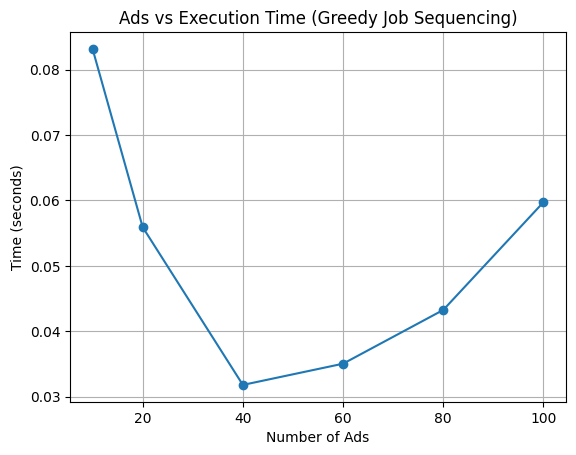

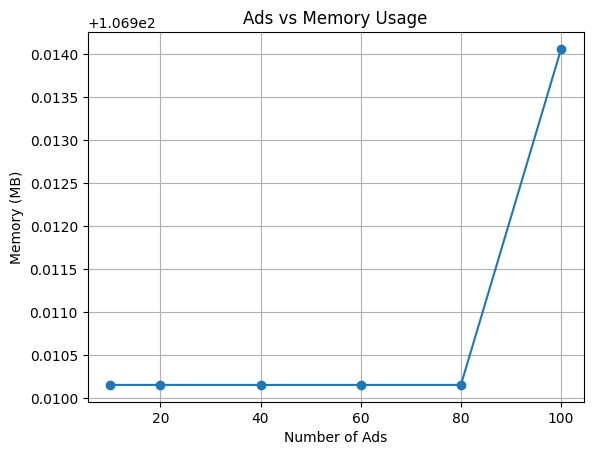

In [4]:
# Problem 1: Greedy – Job Sequencing for TV ads

class Ad:
    def __init__(self, ad_id, deadline, profit):
        self.id = ad_id
        self.deadline = deadline
        self.profit = profit

def schedule_ads(ads):
    ads.sort(key=lambda x: x.profit, reverse=True)
    max_deadline = max(ad.deadline for ad in ads)
    slots = [-1] * (max_deadline + 1)
    total_profit = 0
    selected = []

    for ad in ads:
        for t in range(ad.deadline, 0, -1):
            if slots[t] == -1:
                slots[t] = ad.id
                total_profit += ad.profit
                selected.append(ad.id)
                break

    return selected, total_profit

# Performance test
def run_experiment_ads(n):
    ads = [Ad(i, np.random.randint(1, 10), np.random.randint(10, 100)) for i in range(n)]

    start = time.time()
    mem = memory_usage((schedule_ads, (ads,)), max_iterations=1)
    end = time.time()

    return end - start, max(mem)

sizes = [10, 20, 40, 60, 80, 100]
times, mems = [], []

for s in sizes:
    t, m = run_experiment_ads(s)
    times.append(t)
    mems.append(m)

# Plot 1: Ads vs Time
plt.figure()
plt.plot(sizes, times, marker='o')
plt.xlabel("Number of Ads")
plt.ylabel("Time (seconds)")
plt.title("Ads vs Execution Time (Greedy Job Sequencing)")
plt.grid(True)
plt.show()

# Plot 2: Ads vs Memory
plt.figure()
plt.plot(sizes, mems, marker='o')
plt.xlabel("Number of Ads")
plt.ylabel("Memory (MB)")
plt.title("Ads vs Memory Usage")
plt.grid(True)
plt.show()


Problem 2: Maximizing Profit with Limited Budget

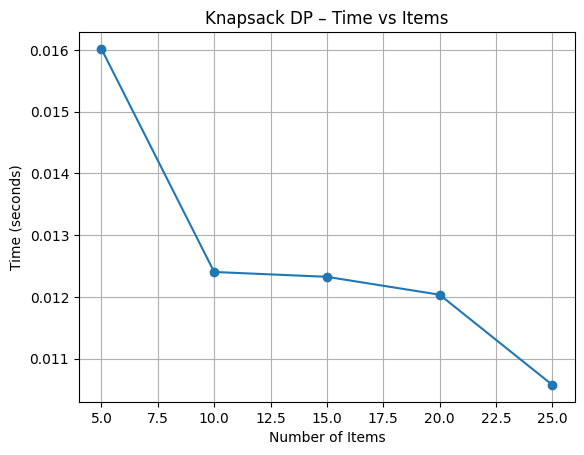

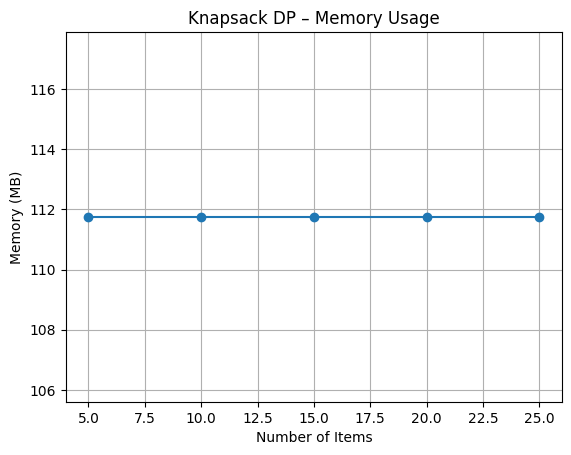

In [5]:
# Problem 2: Knapsack DP

def knapsack(wt, val, W):
    n = len(val)
    dp = [[0]*(W+1) for _ in range(n+1)]

    for i in range(1, n+1):
        for w in range(1, W+1):
            if wt[i-1] <= w:
                dp[i][w] = max(val[i-1] + dp[i-1][w-wt[i-1]], dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]

    return dp[n][W]

def run_knapsack_expt(n):
    weights = np.random.randint(1, 10, n)
    values = np.random.randint(10, 50, n)
    W = np.random.randint(15, 40)

    start = time.time()
    mem = memory_usage((knapsack, (weights, values, W)), max_iterations=1)
    end = time.time()

    return end - start, max(mem)

sizes = [5, 10, 15, 20, 25]
times, mems = [], []

for s in sizes:
    t, m = run_knapsack_expt(s)
    times.append(t)
    mems.append(m)

# Plot 1: Items vs Time
plt.figure()
plt.plot(sizes, times, marker='o')
plt.xlabel("Number of Items")
plt.ylabel("Time (seconds)")
plt.title("Knapsack DP – Time vs Items")
plt.grid(True)
plt.show()

# Plot 2: Items vs Memory
plt.figure()
plt.plot(sizes, mems, marker='o')
plt.xlabel("Number of Items")
plt.ylabel("Memory (MB)")
plt.title("Knapsack DP – Memory Usage")
plt.grid(True)
plt.show()


Problem 3: Solving Sudoku Puzzle


In [6]:
# Problem 3: Sudoku Backtracking

def is_valid(board, r, c, num):
    if any(board[r][j] == num for j in range(9)): return False
    if any(board[i][c] == num for i in range(9)): return False

    R, C = (r//3)*3, (c//3)*3
    for i in range(3):
        for j in range(3):
            if board[R+i][C+j] == num:
                return False
    return True

def solve_sudoku(board):
    for r in range(9):
        for c in range(9):
            if board[r][c] == 0:
                for num in range(1, 10):
                    if is_valid(board, r, c, num):
                        board[r][c] = num
                        if solve_sudoku(board):
                            return True
                        board[r][c] = 0
                return False
    return True

# Sample Sudoku
board = [
[5,3,0,0,7,0,0,0,0],
[6,0,0,1,9,5,0,0,0],
[0,9,8,0,0,0,0,6,0],
[8,0,0,0,6,0,0,0,3],
[4,0,0,8,0,3,0,0,1],
[7,0,0,0,2,0,0,0,6],
[0,6,0,0,0,0,2,8,0],
[0,0,0,4,1,9,0,0,5],
[0,0,0,0,8,0,0,7,9]
]

start = time.time()
mem = memory_usage((solve_sudoku, (board,)), max_iterations=1)
end = time.time()

print("Solved Sudoku:")
for row in board:
    print(row)

print("\nTime:", end - start)
print("Memory:", max(mem), "MB")


Solved Sudoku:
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]

Time: 0.16469573974609375
Memory: 113.3359375 MB


**Problem 4: Password Cracking (Naive)**

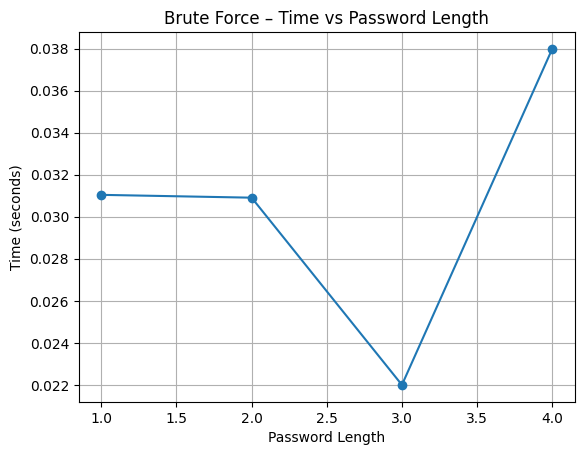

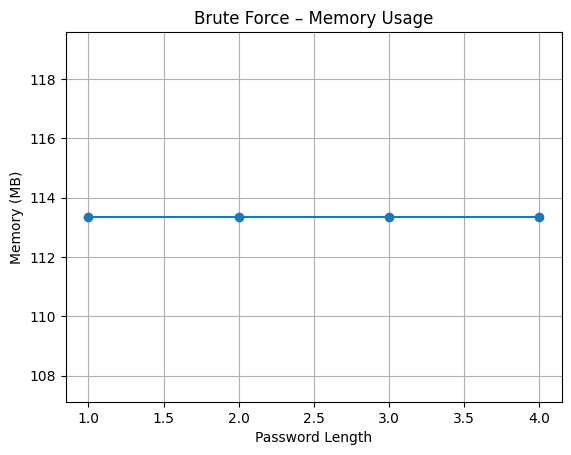

In [7]:
# Problem 4: Brute-Force Password Cracking

import itertools
import string

def crack_password(target, charset):
    attempts = 0
    for length in range(1, len(target)+1):
        for p in itertools.product(charset, repeat=length):
            attempts += 1
            if ''.join(p) == target:
                return target, attempts

# Experiment: vary length
def run_pw_expt(length):
    target = "a" * length
    charset = "abc123"

    start = time.time()
    mem = memory_usage((crack_password, (target, charset)), max_iterations=1)
    end = time.time()

    return end - start, max(mem)

sizes = [1, 2, 3, 4]
times, mems = [], []

for s in sizes:
    t, m = run_pw_expt(s)
    times.append(t)
    mems.append(m)

# Plot 1: Password Length vs Time
plt.figure()
plt.plot(sizes, times, marker='o')
plt.xlabel("Password Length")
plt.ylabel("Time (seconds)")
plt.title("Brute Force – Time vs Password Length")
plt.grid(True)
plt.show()

# Plot 2: Password Length vs Memory
plt.figure()
plt.plot(sizes, mems, marker='o')
plt.xlabel("Password Length")
plt.ylabel("Memory (MB)")
plt.title("Brute Force – Memory Usage")
plt.grid(True)
plt.show()


# COMBINED TIME COMPLEXITY PLOT FOR ALL 4 PROBLEMS

In [9]:
import time
import numpy as np
import psutil
import matplotlib.pyplot as plt

def get_memory_mb():
    process = psutil.Process()
    return process.memory_info().rss / (1024 * 1024)


In [10]:
def measure_ads(n):
    ads = [Ad(i, np.random.randint(1, 10), np.random.randint(10, 100)) for i in range(n)]
    start = time.time()
    schedule_ads(ads)
    end = time.time()
    return end - start


In [11]:
def measure_knapsack(n):
    weights = np.random.randint(1, 10, n)
    values = np.random.randint(10, 50, n)
    W = np.random.randint(15, 40)
    start = time.time()
    knapsack(weights, values, W)
    end = time.time()
    return end - start


In [13]:
def generate_sudoku(empty_cells):
    board = np.array([
        [5,3,0,0,7,0,0,0,0],
        [6,0,0,1,9,5,0,0,0],
        [0,9,8,0,0,0,0,6,0],
        [8,0,0,0,6,0,0,0,3],
        [4,0,0,8,0,3,0,0,1],
        [7,0,0,0,2,0,0,0,6],
        [0,6,0,0,0,0,2,8,0],
        [0,0,0,4,1,9,0,0,5],
        [0,0,0,0,8,0,0,7,9]
    ])

    # Add more empty spots
    for _ in range(empty_cells):
        r = np.random.randint(0, 9)
        c = np.random.randint(0, 9)
        board[r][c] = 0
    return board.tolist()

def measure_sudoku(cells):
    board = generate_sudoku(cells)
    start = time.time()
    solve_sudoku(board)
    end = time.time()
    return end - start


In [15]:
def measure_password(length):
    target = "a" * length
    charset = "abc123"
    start = time.time()
    crack_password(target, charset)
    end = time.time()
    return end - start


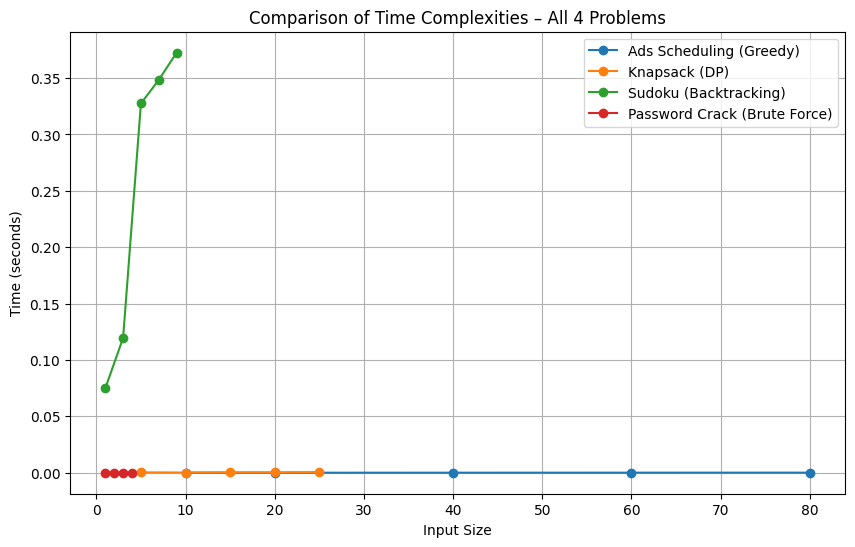

In [16]:
ads_sizes = [10, 20, 40, 60, 80]
knap_sizes = [5, 10, 15, 20, 25]
sudo_sizes = [1, 3, 5, 7, 9]         # number of additional empty cells
pw_sizes   = [1, 2, 3, 4]            # password length

ads_times  = [measure_ads(n) for n in ads_sizes]
knap_times = [measure_knapsack(n) for n in knap_sizes]
sudo_times = [measure_sudoku(n) for n in sudo_sizes]
pw_times   = [measure_password(n) for n in pw_sizes]

plt.figure(figsize=(10,6))

plt.plot(ads_sizes, ads_times, marker='o', label="Ads Scheduling (Greedy)")
plt.plot(knap_sizes, knap_times, marker='o', label="Knapsack (DP)")
plt.plot(sudo_sizes, sudo_times, marker='o', label="Sudoku (Backtracking)")
plt.plot(pw_sizes, pw_times, marker='o', label="Password Crack (Brute Force)")

plt.xlabel("Input Size")
plt.ylabel("Time (seconds)")
plt.title("Comparison of Time Complexities – All 4 Problems")
plt.grid(True)
plt.legend()
plt.show()


# A single combined graph with:

🔵 Greedy (Job Sequencing)

🟢 Dynamic Programming (Knapsack)

🟡 Backtracking (Sudoku)

🔴 Brute Force (Password)

All plotted on one single figure.